## IMPORT LIBRARY

In [ ]:
# %pip install pandas
# %pip install plotly
# %pip install nltk
# %pip install datasets

In [2]:
import zipfile

import pandas as pd
import plotly.express as px
import nltk
import re

from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords



stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## GATHERING DATA

Kita mendapatkan data dari Kaggle platform dengan melakukan sejumlah analisis mengenai pentingnya balancing jumlah label, jumlah dataset yang digunakan karena menggunakan pre-trained model sehingga tidak perlu menggunakan jumlah data yang banyak.
source : 

In [3]:
# Melakukan extrasi file
df = pd.read_csv('../datasets/emotion-classification/emotion-classification3.zip', compression='zip')
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [5]:
df.shape

(34792, 2)

## DATA CLEANING

In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [8]:
df.isna().sum()

Emotion    0
Text       0
dtype: int64

In [9]:
duplicates = df[df.duplicated(keep=False)]
print("Duplicate Rows:\n", duplicates)

Duplicate Rows:
        Emotion                                               Text
0      neutral                                             Why ? 
5         fear  I'm expecting an extremely important phonecall...
10       anger  The bull tossed the effigy out of their hands ...
12         joy  For once in his life , Leopold must have been ...
27         joy  One could get terribly ecstatic but that would...
...        ...                                                ...
34757      joy  The young lord was overjoyed to see what a bea...
34765  neutral                                            Sure . 
34771  neutral                                         Too bad . 
34781     fear  Tom Shakeshaft , who is 15 , reveals his disma...
34783  neutral                                         Not yet . 

[6224 rows x 2 columns]


In [10]:
df = df.drop_duplicates()

# Display the number of duplicates removed
print(f"Number of duplicates removed: {df.duplicated().sum()}")
print("Cleaned DataFrame:\n", df.head())

Number of duplicates removed: 0
Cleaned DataFrame:
    Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...


In [11]:
df.shape

(31162, 2)

In [12]:
df.duplicated().sum()

0

In [13]:
df['Emotion'].value_counts()

Emotion
joy         10464
sadness      6175
fear         4266
surprise     4015
anger        3777
neutral      1466
disgust       855
shame         144
Name: count, dtype: int64

## DATA TEXT PROCESSING

In [14]:
df = df.rename(columns={'Emotion':'kategori', 'Text':'text'})

In [15]:
df['label'] = df['kategori']

In [16]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['label'] = ord_enc.fit_transform(df[['label']]).astype(int)

In [17]:
df.head()

,kategori,text,label
0,neutral,Why ?,4
1,joy,Sage Act upgrade on my to do list for tommorow.,3
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,5
3,joy,Such an eye ! The true hazel eye-and so brill...,3
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,3


In [18]:
import re

def text_preprocessing(text):
  text = text.lower()                                 # Mengubah teks menjadi lower case
  text = re.sub(r'https?//\s+|www\.\S+', '', text)    # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)             # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                  # Menghapus karakter tanda baca
  text = text.strip()                                   # Menghapus whitespaces
  return text

In [19]:
%time df['text_processed'] = df['text'].apply(text_preprocessing)

CPU times: total: 141 ms
Wall time: 180 ms


In [20]:
new_order = ['kategori', 'label', 'text', 'text_processed']
df = df.reindex(columns=new_order)

In [21]:
df.head()

,kategori,label,text,text_processed
0,neutral,4,Why ?,why
1,joy,3,Sage Act upgrade on my to do list for tommorow.,sage act upgrade on my to do list for tommorow
2,sadness,5,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,on the way to my homegirl baby funeral man i h...
3,joy,3,Such an eye ! The true hazel eye-and so brill...,such an eye the true hazel eyeand so brillian...
4,joy,3,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,iluvmiasantos ugh babe hugggzzz for u babe n...


In [22]:
df['text'][1]

'Sage Act upgrade on my to do list for tommorow.'

In [23]:
df['text'].iloc[:5]

0                                               Why ? 
1      Sage Act upgrade on my to do list for tommorow.
2    ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3     Such an eye ! The true hazel eye-and so brill...
4    @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
Name: text, dtype: object

In [24]:
import re

text = "@fe ed \"RT @MirayaDizon1: Time is ticking fast. Relive the past happy moments while we can. Be the joy to everyone\'s face. #MaineLovesMAC #ALDUBW…\""

# Regular expression to remove unwanted characters
pattern = r'@\w+|RT|#'

# Clean the text using the regular expression
cleaned_text = re.sub(pattern, '', text)

# Remove extra whitespace and quotation marks
cleaned_text = cleaned_text.strip().replace('"', '')

print(cleaned_text)

ed  : Time is ticking fast. Relive the past happy moments while we can. Be the joy to everyone's face. MaineLovesMAC ALDUBW…


## Exploratory Data Analysis

<Axes: xlabel='kategori'>

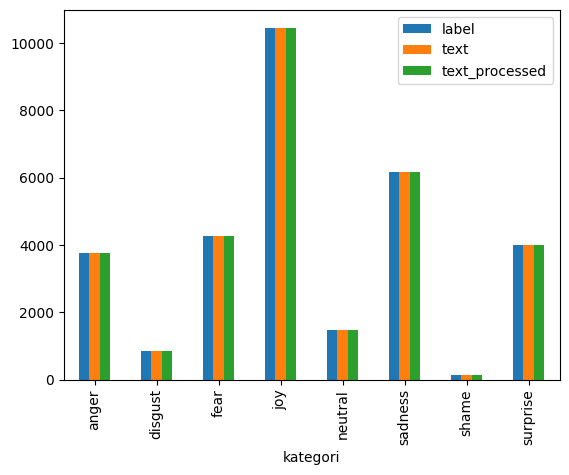

In [25]:
df.groupby('kategori').count().plot(kind='bar')

Text(0.5, 0.98, 'Distribution of text length for Anger Category Message.')

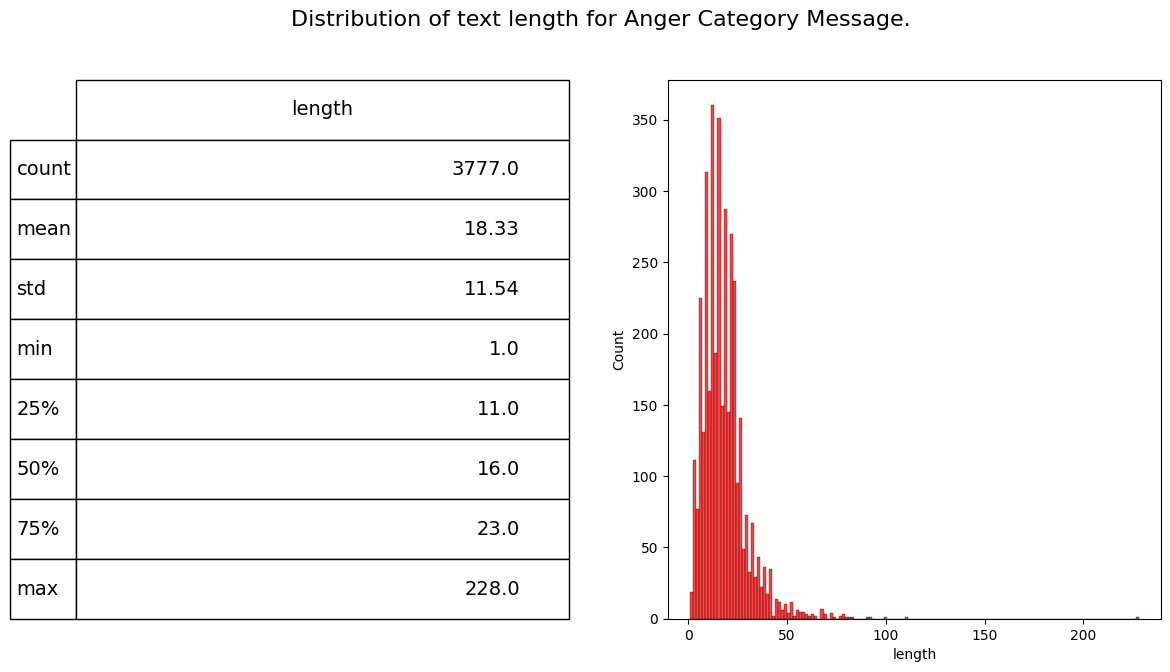

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(14,7))
df['length'] = df.text_processed.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['kategori']=='anger']['length'], ax=ax1,color='red')
describe = df.length[df.kategori=='anger'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Anger Category Message.', fontsize=16)

## FEATURE ENGINEERING

In [27]:
df = df.drop(columns=['kategori','text', 'length'])
df.rename(columns={"text_processed": "text"}, inplace=True)
df

,label,text
0,4,why
1,3,sage act upgrade on my to do list for tommorow
2,5,on the way to my homegirl baby funeral man i h...
3,3,such an eye the true hazel eyeand so brillian...
4,3,iluvmiasantos ugh babe hugggzzz for u babe n...
...,...,...
34787,7,michelgw have you gift hope you like it its ha...
34788,3,the world didnt give it to meso the world most...
34789,0,a man robbed me today
34790,2,youu call it jealousy i call it of losing you


## DATA SPLITTING

In [35]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

df_train, df_test = train_test_split(
    df,
    test_size=0.1,
    random_state=RANDOM_SEED,
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.4,
    random_state=RANDOM_SEED,
)
     

In [36]:
print(f'Total Train: {len(df_train)}')
print(f'Total Val  : {len(df_val)}')
print(f'Total Test : {len(df_test)}')

Total Train: 28045
Total Val  : 1870
Total Test : 1247


In [37]:
df_train.to_csv("../datasets/emotion-classification/train.csv", index=False)
df_val.to_csv("../datasets/emotion-classification/val.csv", index=False)
df_test.to_csv("../datasets/emotion-classification/test.csv", index=False)